In [ ]:
import pip
pip.main(['install', 'pandas'])
pip.main(['install', 'matplotlib'])
pip.main(['install', 'seaborn'])
pip.main(['install', 'scikit-learn'])

# CHARGEMENT DES BIBLIOTHEQUES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

Chargement du jeu de données "LIGNES_TICKET_V4"

In [13]:
dataset_path = "C:\\Users\\belga\\OneDrive\\Bureau\\EMBA Big Data\\Module Datascience\\Projet Data Science S2 2024\\LIGNES_TICKET_V4.csv"
data3 = pd.read_csv(dataset_path, sep='|', low_memory=False)
print(data3.shape)
print(list(data3.columns))

(34105705, 7)
['IDTICKET', 'NUMLIGNETICKET', 'IDARTICLE', 'QUANTITE', 'MONTANTREMISE', 'TOTAL', 'MARGESORTIE']


La ligne de code ci-dessous nous permet de voir le détail des colonnes de notre jeu de données ainsi que le type de données (chaîne de caractères, numérique)

In [14]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34105705 entries, 0 to 34105704
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   IDTICKET        int64 
 1   NUMLIGNETICKET  int64 
 2   IDARTICLE       object
 3   QUANTITE        object
 4   MONTANTREMISE   object
 5   TOTAL           object
 6   MARGESORTIE     object
dtypes: int64(2), object(5)
memory usage: 1.8+ GB


Aperçu du jeu de données.

In [15]:
data3

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE
0,190400316260,2,246208,"1,000",",000","4,96","2,37"
1,190400316262,2,33725,"1,000",",000","8,25","3,63"
2,190400316262,3,634497,"1,000",",000","5,79","3,63"
3,190400316262,1,257613,"1,000",",000","18,29","6,21"
4,190400316263,1,257627,"1,000",",000","49,92","10,42"
...,...,...,...,...,...,...,...
34105700,340200383203,2,257643,1,0,"4,69","1,83"
34105701,340200383203,3,50170,1,0,"3,18",1
34105702,340200383203,4,349345,1,0,"3,46","1,13"
34105703,340200383203,5,250580,2,0,"6,8","2,18"


Afin d'exploiter de façon optimale les informations, nous allons convetir les l'ID TICKET et le NUM LIGNE TICKET en caractère. A l'inverse, nous devons convertir les quantités, les montants, les totaux et les marges en valeur numérique.

In [16]:
data3['IDTICKET'] = data3['IDTICKET'].astype(str)
data3['NUMLIGNETICKET'] = data3['NUMLIGNETICKET'].astype(str)

In [17]:
data3["QUANTITE"]=data3['QUANTITE'].str.replace(',', '.').astype(float)

In [18]:
data3["TOTAL"]=data3['TOTAL'].str.replace(',', '.').astype(float)

In [19]:
data3["MONTANTREMISE"]=data3['MONTANTREMISE'].str.replace(',', '.').astype(float)

In [20]:
data3["MARGESORTIE"]=data3['MARGESORTIE'].str.replace(',', '.').astype(float)

Vérification du traitement.

In [21]:
data3

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE
0,190400316260,2,246208,1.0,0.000,4.96,2.37
1,190400316262,2,33725,1.0,0.000,8.25,3.63
2,190400316262,3,634497,1.0,0.000,5.79,3.63
3,190400316262,1,257613,1.0,0.000,18.29,6.21
4,190400316263,1,257627,1.0,0.000,49.92,10.42
...,...,...,...,...,...,...,...
34105700,340200383203,2,257643,1.0,0.000,4.69,1.83
34105701,340200383203,3,50170,1.0,0.000,3.18,1.00
34105702,340200383203,4,349345,1.0,0.000,3.46,1.13
34105703,340200383203,5,250580,2.0,0.000,6.80,2.18


#data3['TOTAL'].replace({'': '0.0'}, inplace=True)

Vérification du traitement.

In [22]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34105705 entries, 0 to 34105704
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   IDTICKET        object 
 1   NUMLIGNETICKET  object 
 2   IDARTICLE       object 
 3   QUANTITE        float64
 4   MONTANTREMISE   float64
 5   TOTAL           float64
 6   MARGESORTIE     float64
dtypes: float64(4), object(3)
memory usage: 1.8+ GB


La ligne de code ci-dessous nous permet d'identifier les valeurs en doublons qui conviendra de traiter.

In [23]:
print(data3.duplicated().sum())
data = data3.drop_duplicates()

130


Nous allons désormais procéder au traitement de ces doublons.

In [50]:
data3.drop_duplicates(keep='first', inplace=True)

Code de vérification.

In [51]:
print(data3.duplicated().sum())

0


Nous procédons également à la vérification de présence ou non de valeurs manquantes (aucune valeur détectée).

In [24]:
pd.DataFrame(index=data.columns, columns=['%_missing_values'], data= (data.isna().sum().values / len(data)*100))

,%_missing_values
IDTICKET,0.0
NUMLIGNETICKET,0.0
IDARTICLE,0.0
QUANTITE,0.0
MONTANTREMISE,0.0
TOTAL,0.0
MARGESORTIE,0.0


Il convient à présent de vérifier la présence de valeur aberrantes.

<Axes: >

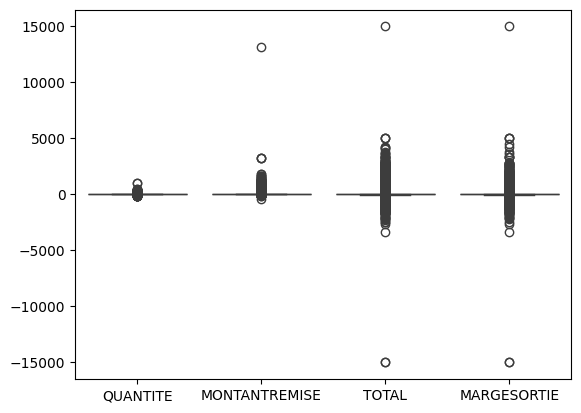

In [26]:
# Visualisation des boxplots des variables numériques
sns.boxplot(data3)

La série de code ci-dessous permet de traiter les valeurs aberrantes en présence, sur chacune des catégories concernées.

In [38]:
''' Detection '''
# IQR
Q1 = np.percentile(data3['QUANTITE'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data3['QUANTITE'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data3.shape)

Old Shape:  (30965162, 7)


In [39]:
# Upper bound
upper = np.where(data3['QUANTITE'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data3['QUANTITE'] <= (Q1-1.5*IQR))

In [40]:
# IQR
Q1 = np.percentile(data3['TOTAL'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data3['TOTAL'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data3.shape)

Old Shape:  (30965162, 7)


In [41]:
# Upper bound
upper = np.where(data3['TOTAL'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data3['TOTAL'] <= (Q1-1.5*IQR))

In [42]:
# IQR
Q1 = np.percentile(data3['MONTANTREMISE'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data3['MONTANTREMISE'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data3.shape)

Old Shape:  (30965162, 7)


In [43]:
# Upper bound
upper = np.where(data3['MONTANTREMISE'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data3['MONTANTREMISE'] <= (Q1-1.5*IQR))

In [44]:
# IQR
Q1 = np.percentile(data3['MARGESORTIE'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data3['MARGESORTIE'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data3.shape)

Old Shape:  (30965162, 7)


In [45]:
# Upper bound
upper = np.where(data3['MARGESORTIE'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data3['MARGESORTIE'] <= (Q1-1.5*IQR))

In [49]:
print("New Shape: ", data3.shape)

New Shape:  (30965162, 7)
